In [ ]:
!nvidia-smi

Fri Nov  5 07:44:30 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   67C    P8    34W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!wget https://unsplash-datasets.s3.amazonaws.com/lite/latest/unsplash-research-dataset-lite-latest.zip

--2021-11-05 07:44:31--  https://unsplash-datasets.s3.amazonaws.com/lite/latest/unsplash-research-dataset-lite-latest.zip
Resolving unsplash-datasets.s3.amazonaws.com (unsplash-datasets.s3.amazonaws.com)... 52.217.64.76
Connecting to unsplash-datasets.s3.amazonaws.com (unsplash-datasets.s3.amazonaws.com)|52.217.64.76|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 632351052 (603M) [application/zip]
Saving to: ‘unsplash-research-dataset-lite-latest.zip’

unsplash-research-d 100%[===================>] 603.06M  51.0MB/s    in 10s     

2021-11-05 07:44:42 (59.6 MB/s) - ‘unsplash-research-dataset-lite-latest.zip’ saved [632351052/632351052]



In [ ]:
!unzip unsplash-research-dataset-lite-latest.zip

Archive:  unsplash-research-dataset-lite-latest.zip
  inflating: collections.tsv000      
  inflating: __MACOSX/._collections.tsv000  
  inflating: colors.tsv000           
  inflating: __MACOSX/._colors.tsv000  
  inflating: conversions.tsv000      
  inflating: __MACOSX/._conversions.tsv000  
  inflating: DOCS.md                 
  inflating: keywords.tsv000         
  inflating: __MACOSX/._keywords.tsv000  
  inflating: photos.tsv000           
  inflating: __MACOSX/._photos.tsv000  
  inflating: README.md               
  inflating: TERMS.md                


In [ ]:
!git clone https://github.com/openai/CLIP

Cloning into 'CLIP'...
remote: Enumerating objects: 181, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 181 (delta 4), reused 6 (delta 3), pack-reused 168
Receiving objects: 100% (181/181), 8.90 MiB | 20.34 MiB/s, done.
Resolving deltas: 100% (86/86), done.


In [ ]:
!pip install ftfy

     |████████████████████████████████| 64 kB 1.8 MB/s 
  Created wheel for ftfy: filename=ftfy-6.0.3-py3-none-any.whl size=41933 sha256=fabcb797c5210a18b326329fd8cf21c710114276cff5503a69adb17b00346480
  Stored in directory: /root/.cache/pip/wheels/19/f5/38/273eb3b5e76dfd850619312f693716ac4518b498f5ffb6f56d
Successfully built ftfy


In [ ]:
import sys

CLIP_DIR = "CLIP"
sys.path.append(CLIP_DIR)

In [ ]:
import clip
import torch
from PIL import Image
from tqdm.notebook import tqdm
import numpy as np
import csv

In [ ]:
photo_urls = []
with open("/content/unsplash-dataset/photos.tsv000") as fIn:
    reader = csv.DictReader(fIn, delimiter='\t')
    for row in tqdm(reader):
        photo_urls.append([row['photo_id'], row['photo_image_url']])

print(f'Photos in the dataset: {len(photo_urls)}')

0it [00:00, ?it/s]

Photos in the dataset: 25000


In [ ]:
from pathlib import Path

dataset_version = "lite"
unsplash_dataset_path = Path("/content/unsplash-dataset") / dataset_version

In [ ]:
import urllib.request

photos_download_path = unsplash_dataset_path / "photos"

def download_photo(photo):
    photo_id = photo[0]
    # Get the URL of the photo (setting the width to 640 pixels)
    photo_url = photo[1] + "?w=640"
    photo_path = photos_download_path / (photo_id + ".jpg")
    if not photo_path.exists():
        try:
            urllib.request.urlretrieve(photo_url, photo_path)
        except Exception as e:
            print(f"Cannot download {photo_url}", e)
            pass

In [ ]:
photos_download_path.mkdir(parents=True)

In [ ]:
from multiprocessing.pool import ThreadPool

#create a thread pool son that we can download multiple phiotos at a time
threads_count = 256
pool = ThreadPool(threads_count)

In [ ]:
ret = pool.map(download_photo, photo_urls)

Cannot download https://images.unsplash.company%20by%20Alessandro%20Desantis%20-%20Downloaded%20from%20500px_jpg.jpg?w=640 URL can't contain control characters. 'images.unsplash.company by Alessandro Desantis - Downloaded from 500px_jpg.jpg' (found at least ' ')
Cannot download https://images.unsplash.com/photo-1481930079977-24a345fcae85?w=640 HTTP Error 422: Unprocessable Entity
Cannot download https://images.unsplash.com_TheBeach.jpg?w=640 <urlopen error [Errno -2] Name or service not known>
Cannot download https://images.unsplash.com-grass-sun.jpg?w=640 <urlopen error [Errno -2] Name or service not known>


In [ ]:
photos_files = list(photos_download_path.glob("*.jpg"))
print(f'Photos downloaded: {len(photos_files)}')

Photos downloaded: 24996


In [ ]:
!zip -r -q /content/unsplash-dataset.zip /content/unsplash-dataset/

In [ ]:
!cp /content/unsplash-dataset.zip /content/drive/MyDrive/

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
model,preprocess = clip.load("ViT-B/32", device=device)

100%|███████████████████████████████████████| 338M/338M [00:03<00:00, 94.4MiB/s]


In [ ]:
photos_files[1], photo_urls[1]

(PosixPath('/content/unsplash-dataset/lite/photos/rldNiZx1fNI.jpg'),
 ['rDLBArZUl1c',
  'https://images.unsplash.com/photo-1416339411116-62e1226aacd8'])

In [ ]:
id_url_dict = {}
def assign(x):
    id_url_dict[x[0]]=x[1]
ret = list(map(assign, photo_urls))

In [ ]:
def process_batch(photo_batch):
    images = []
    batch_photo_ids = []
    for pf in photo_batch:
        images.append(preprocess(Image.open(pf)))
        batch_photo_ids.append(pf.name.split('.jpg')[0])
    images_tensor = torch.stack(images).to(device)
    with torch.no_grad():
        images_features = model.encode_image(images_tensor)
        images_features /= images_features.norm(dim=-1, keepdim=True)
    return images_features.cpu(), batch_photo_ids

In [ ]:
BATCH_SIZE = 256
images_embeddings = []
photo_ids = []

for i in tqdm(range(0, len(photos_files), BATCH_SIZE)):
    images_features, batch_photo_ids = process_batch(photos_files[i:i+BATCH_SIZE])
    photo_ids.extend(batch_photo_ids)
    images_embeddings.append(images_features)


  0%|          | 0/98 [00:00<?, ?it/s]

In [ ]:
images_embeddings = torch.cat(images_embeddings)

In [ ]:
torch.save(images_embeddings, 'images_embeddings.pt')

In [ ]:
images_embeddings.shape, len(photo_ids)

(torch.Size([24996, 512]), 24996)

In [ ]:
images_embeddings = torch.load('images_embeddings.pt')

In [ ]:
import pickle

In [ ]:
images_embeddings.shape, len(photo_ids)

(torch.Size([24996, 512]), 24996)

In [ ]:
images_embeddings = images_embeddings.to(device)

In [ ]:
def get_sim(inp_q=["dolphin in ocean"]):
    with torch.no_grad():
        text = clip.tokenize(inp_q)
        text = text.to(device)
        text_features = model.encode_text(text)
        text_features /= text_features.norm(dim=-1, keepdim=True)
        logit_scale = 100#model.logit_scale.exp()
        logits_per_image = (logit_scale * images_embeddings @ text_features.t()).squeeze()
        logits_per_image = logits_per_image.cpu().numpy()
    return logits_per_image

In [ ]:
text = clip.tokenize(["dolphin in ocean"]).to(device)

In [ ]:
model, preprocess = clip.load("ViT-B/32", device=device)

In [ ]:
with torch.no_grad():
    text_features = model.encode_text(text)

In [ ]:
text_features[0,:20]

tensor([-0.0154, -0.1428, -0.1223, -0.0182,  0.1130, -0.3296, -0.4170, -0.6255,
        -0.1262,  0.3801, -0.0668, -0.5693,  0.3572, -0.2603,  0.2352,  0.2683,
         0.0740,  0.5576,  0.2493,  0.2661], device='cuda:0',
       dtype=torch.float16)

In [ ]:
logits_per_image = get_sim(["dolphin in ocean"])
logits_per_image[:20]

array([20.94 , 23.34 , 15.875, 21.56 , 21.69 , 14.734, 14.586, 16.83 ,
       13.664, 14.74 , 27.05 , 13.86 , 19.4  , 18.75 ,  9.68 , 14.7  ,
       23.23 , 18.64 , 11.09 , 20.78 ], dtype=float16)

In [ ]:
logits_per_image[:20]

array([20.94 , 23.34 , 15.875, 21.56 , 21.69 , 14.734, 14.586, 16.83 ,
       13.664, 14.74 , 27.05 , 13.86 , 19.4  , 18.75 ,  9.68 , 14.7  ,
       23.23 , 18.64 , 11.09 , 20.78 ], dtype=float16)

In [ ]:
best_photo_idx = np.argsort(logits_per_image)[::-1]
best_photos = [(logits_per_image[i],i) for i in best_photo_idx]
best_photos[:5]

[(31.78, 15564), (31.2, 18764), (31.19, 11128), (30.77, 17026), (30.45, 5328)]

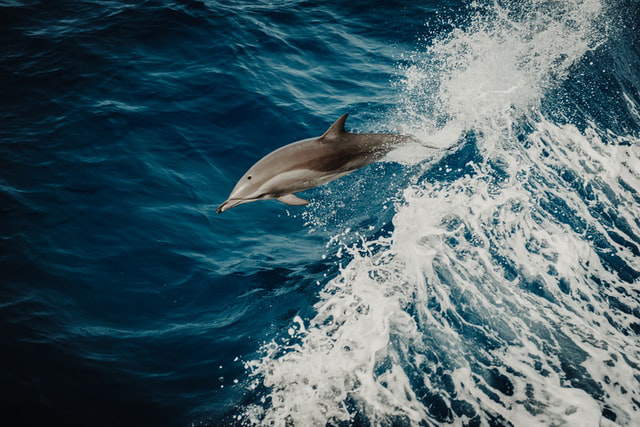

In [ ]:
Image.open(photos_download_path / (photo_ids[best_photo_idx[0]] + ".jpg"))